In [105]:
import numpy as np
import pandas as pd
import operator
import pickle
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler, SMOTE
import warnings
warnings.filterwarnings(action='once')

import xgboost
from xgboost import XGBClassifier
from sklearn.tree import export_graphviz
import graphviz
#from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import *
import warnings
warnings.filterwarnings(action='once')
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from itertools import cycle

In [35]:
X = pd.read_pickle('../../Data/Opioids/Model_Data/SMOTE/X.pickle')
y = np.load('../../Data/Opioids/Model_Data/SMOTE/y.pickle')
X_resampled = np.load('../../Data/Opioids/Model_Data/SMOTE/X_resampled.pickle')
y_resampled = np.load('../../Data/Opioids/Model_Data/SMOTE/y_resampled.pickle')
X_res_vis = np.load('../../Data/Opioids/Model_Data/SMOTE/X_res_vis.pickle')
X_vis = np.load('../../Data/Opioids/Model_Data/SMOTE/X_vis.pickle')
X_train = pd.read_pickle('../../Data/Opioids/Model_Data/SMOTE/X_train.pickle')
Y_train = pd.read_pickle('../../Data/Opioids/Model_Data/SMOTE/Y_train.pickle')
X_test = pd.read_pickle('../../Data/Opioids/Model_Data/SMOTE/X_test.pickle')
Y_test = pd.read_pickle('../../Data/Opioids/Model_Data/SMOTE/Y_test.pickle')

In [39]:
len(X_train)

31950

In [38]:
X_train.drop([18,19,24,25], axis=1, inplace=True)
X_train

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,20,21,22,23
0,0.781452,0.605768,-0.582172,0.152126,0.136251,-0.179525,0.928584,-0.028225,-0.022297,0.011493,...,-0.003950,-0.035524,-0.025535,-0.007896,-0.008384,0.000635,-0.004214,-2.817260e-15,9.094444e-19,1.798498e-18
1,0.235672,-0.062750,-0.364989,0.566338,1.060839,-0.023355,-0.146182,0.056138,0.003896,-0.006061,...,-0.012047,0.038815,-0.011019,-0.007807,-0.000826,-0.001268,0.000068,-1.429481e-15,8.132523e-19,1.601550e-18
2,0.875419,0.797947,0.388860,0.048234,0.061402,-0.120645,-0.069262,-0.014269,-0.000352,0.008468,...,-0.002173,-0.001380,0.000975,-0.003720,-0.003012,0.001050,-0.000415,-3.760950e-15,3.206380e-20,6.361959e-21
3,0.653158,-0.105304,-0.468382,-0.521577,-0.207571,-0.108542,-0.015513,-0.001223,0.000377,0.010224,...,-0.003093,-0.002392,0.001395,-0.000575,0.001106,-0.000089,0.000479,2.358533e-16,2.364310e-20,3.193177e-20
4,-0.726376,-0.086597,-0.336246,-0.258816,-0.113977,-0.095171,-0.047170,-0.013857,-0.000465,0.006813,...,0.001151,-0.000291,0.001558,-0.000917,0.000142,-0.000640,-0.000780,2.373033e-15,-2.733925e-19,-4.021991e-19
5,0.869045,0.793013,0.394932,0.116444,0.110364,-0.207309,0.921079,-0.071113,-0.021060,0.023285,...,0.030686,0.014494,-0.013401,-0.003714,-0.005727,0.000058,0.002438,-3.816461e-15,3.597497e-19,1.524695e-18
6,0.124224,-0.757080,-0.265123,0.552535,-0.517043,-0.084865,-0.079990,-0.007758,0.000031,0.006191,...,-0.006529,0.003495,0.000580,0.000635,0.016323,-0.005111,0.002809,1.401588e-15,2.645785e-19,9.930627e-19
7,0.740697,0.082246,0.508633,-0.556399,-0.232946,-0.137467,-0.018783,-0.000564,-0.000594,0.008209,...,-0.001408,-0.000112,0.000994,-0.002487,0.000034,0.000094,0.000056,-1.262948e-15,7.697971e-20,2.350873e-19
8,0.653154,-0.105288,-0.468394,-0.521558,-0.207567,-0.108592,-0.015441,0.001732,0.000720,0.008807,...,-0.002339,-0.003880,0.001674,-0.000809,0.000512,0.000073,0.000312,2.358533e-16,-5.892209e-21,-4.202480e-20
9,0.211772,-0.569592,0.711993,0.517431,-0.542640,-0.113452,-0.083984,-0.019046,-0.001857,-0.006869,...,0.036819,-0.008695,0.003065,-0.002204,-0.002004,0.000577,-0.000310,4.023868e-16,-2.628468e-19,-7.086000e-19


In [40]:
X_test.drop([18,19,24,25], axis=1, inplace=True)
X_test

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,20,21,22,23
0,0.211678,-0.569146,0.711677,0.518325,-0.542176,-0.115105,-0.081212,0.065374,0.006964,-0.016223,...,0.003564,-0.011937,0.002108,-0.006548,0.000519,-0.000361,-0.000354,-8.743697e-16,9.687754e-20,2.351270e-19
1,0.100985,-0.779026,-0.245254,-0.039693,0.765629,-0.038109,-0.099515,-0.013103,-0.000769,0.006870,...,0.004071,-0.002375,0.002865,-0.000702,-0.000159,-0.000878,0.000032,2.733855e-15,-6.887126e-20,-6.091099e-20
2,0.653167,-0.105407,-0.468351,-0.521745,-0.207661,-0.108287,-0.015888,-0.016127,-0.001884,-0.001322,...,-0.001934,-0.002664,0.001532,0.000139,-0.000003,0.000141,0.000157,4.023868e-16,-7.677332e-20,-1.541508e-19
3,-0.638919,0.100837,0.640657,-0.293700,-0.139422,-0.124306,-0.050119,0.001919,0.000982,0.006542,...,-0.001854,-0.008462,0.002654,-0.002095,-0.000292,0.000519,0.000232,5.411647e-16,-7.916883e-20,-1.843925e-19
4,0.875297,0.799398,0.390572,0.049985,0.060713,-0.064516,-0.053707,0.158286,-0.000087,-0.082967,...,-0.098390,0.174395,-0.056953,-0.013791,-0.056611,0.010085,-0.014605,-8.146330e-15,-1.331696e-18,-5.086318e-18
5,-0.726387,-0.086754,-0.336236,-0.259035,-0.114095,-0.094888,-0.047613,-0.027698,-0.001979,0.003812,...,-0.000682,-0.001521,0.001796,0.000383,-0.001972,0.000537,-0.000332,2.484055e-15,-2.200199e-19,-4.504800e-19
6,0.211749,-0.569696,0.711869,0.517400,-0.542617,-0.113402,-0.083967,-0.020833,-0.001638,0.001061,...,-0.002770,-0.002613,0.002290,-0.000396,0.004226,-0.001290,0.000947,2.358533e-16,-1.525838e-20,1.092632e-19
7,0.100900,-0.778816,-0.245317,-0.038983,0.766039,-0.039458,-0.097010,0.040811,0.001953,-0.015777,...,-0.006166,0.009202,-0.002865,-0.002848,0.014595,-0.004417,0.003759,1.290565e-15,9.199256e-19,2.200138e-18
8,0.124193,-0.757063,-0.265067,0.552889,-0.516798,-0.085436,-0.078759,0.009601,-0.001049,-0.014595,...,-0.017177,0.026787,-0.007062,-0.000746,0.008812,-0.003874,0.000750,8.464760e-16,8.569075e-20,3.740669e-19
9,0.878748,0.818997,0.412373,0.029398,0.018051,0.872839,0.022947,0.032140,0.000930,0.000528,...,0.003571,-0.006560,0.000620,-0.006922,-0.004427,0.001457,-0.001228,-3.871972e-15,1.524037e-19,2.375490e-19


In [41]:
X_train.columns = ['GENDER', 'EXPIRE_FLAG', 'TOTAL_NARCOTIC_PRESCRIPTONS',
       'TOTAL_ANTI_NARCOTIC_PRESCRIPTONS', 'NARCOTIC', 'ANTI-NARCOTIC',
       'ICU_STAY', 'OXYMORPHONE', 'OXYCODONE', 'MORPHINE', 'MEPERIDINE',
       'HYDROMORPHONE', 'HYDROCODONE', 'FENTANYL', 'CODEINE', 'BUPRENORPHINE',
       'METHADONE', 'NALOXONE', 'AGE_3', 'AGE_4', 'AGE_5', 'AGE_6']
X_test.columns = ['GENDER', 'EXPIRE_FLAG', 'TOTAL_NARCOTIC_PRESCRIPTONS',
       'TOTAL_ANTI_NARCOTIC_PRESCRIPTONS', 'NARCOTIC', 'ANTI-NARCOTIC',
       'ICU_STAY', 'OXYMORPHONE', 'OXYCODONE', 'MORPHINE', 'MEPERIDINE',
       'HYDROMORPHONE', 'HYDROCODONE', 'FENTANYL', 'CODEINE', 'BUPRENORPHINE',
       'METHADONE', 'NALOXONE', 'AGE_3', 'AGE_4', 'AGE_5', 'AGE_6']
len(X_train)

31950

In [42]:
validation_range = int(0.8*len(X_train))
X_val = X_train.iloc[range(validation_range, len(X_train))]
Y_val = Y_train.iloc[range(validation_range, len(Y_train))]
len(Y_val)

6390

In [43]:
X_train = X_train.iloc[range(0, validation_range)]
Y_train = Y_train.iloc[range(0, validation_range)]
len(X_train)

25560

In [44]:
model = XGBClassifier()

param_grid = {"max_depth": [3, 5, 8, 10], 
             "learning_rate": [0.03, 0.1], 
             "n_estimators": [50, 100, 150, 200], 
             "objective": ['binary:logistic']}

clf = GridSearchCV(model, param_grid=param_grid)

In [45]:
warnings.filterwarnings('ignore')
clf.fit(X_val, Y_val)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 8, 10], 'learning_rate': [0.03, 0.1], 'n_estimators': [50, 100, 150, 200], 'objective': ['binary:logistic']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 200,
 'objective': 'binary:logistic'}

In [47]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 8, n_estimators = 200, objective = 'binary:logistic')
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [48]:
y_pred = model.predict(X_test)
model.score(X_test, Y_test)

0.9332749123685529

In [49]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.95      0.92      0.93      3990
        1.0       0.92      0.95      0.93      3998

avg / total       0.93      0.93      0.93      7988



In [94]:
df_confusion = pd.crosstab(Y_test, y_pred, rownames=['True Value'], colnames=['Predicted Value'], margins=True)
df_confusion = df_confusion.drop(['All'], axis=1)
df_confusion = df_confusion.drop(['All'])
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.Blues):
    fig, ax = plt.subplots()
    ax.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    for (i, j) in np.ndenumerate(df_confusion):
        ax.text(j, i, '{:d}'.format(z), ha='center', va='center')
    #ax.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    ax.tick_params
    ax.xticks(tick_marks, df_confusion.columns, rotation=45)
    ax.yticks(tick_marks, df_confusion.index)
    #plt.title('Confusion Matrix')
    ax.ylabel(df_confusion.index.name)
    ax.xlabel(df_confusion.columns.name)
    plt.show()
plot_confusion_matrix(df_confusion)
confusion_matrix(Y_test, y_pred, labels=[0,1])

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x117ffb400> (for post_execute):


TypeError: float() argument must be a string or a number, not 'tuple'

TypeError: float() argument must be a string or a number, not 'tuple'

array([[3655,  335],
       [ 198, 3800]])

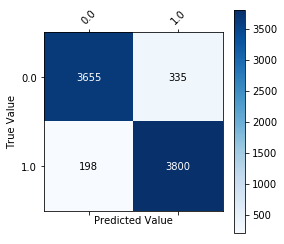

In [101]:
df_confusion = pd.crosstab(Y_test, y_pred, rownames=['True Value'], colnames=['Predicted Value'], margins=True)
df_confusion = df_confusion.drop(['All'], axis=1)
df_confusion = df_confusion.drop(['All'])
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    for (i, j), z in np.ndenumerate(df_confusion):
        plt.text(j, i, '{:d}'.format(z), ha='center', va='center', color="white" if z>3000 else "black")
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.title('Confusion Matrix')
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)
confusion_matrix(Y_test, y_pred, labels=[0,1])

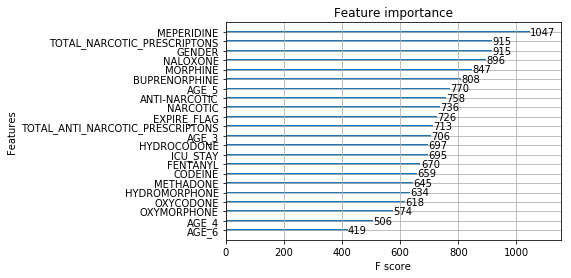

['AGE_6', 'AGE_4', 'OXYMORPHONE', 'OXYCODONE', 'HYDROMORPHONE', 'METHADONE', 'CODEINE', 'FENTANYL', 'ICU_STAY', 'HYDROCODONE', 'AGE_3', 'TOTAL_ANTI_NARCOTIC_PRESCRIPTONS', 'EXPIRE_FLAG', 'NARCOTIC', 'ANTI-NARCOTIC', 'AGE_5', 'BUPRENORPHINE', 'MORPHINE', 'NALOXONE', 'GENDER', 'TOTAL_NARCOTIC_PRESCRIPTONS', 'MEPERIDINE']


In [50]:
importances = model.feature_importances_
indices = np.argsort(importances)[::]
predictors = ['GENDER', 'EXPIRE_FLAG', 'TOTAL_NARCOTIC_PRESCRIPTONS',
       'TOTAL_ANTI_NARCOTIC_PRESCRIPTONS', 'NARCOTIC', 'ANTI-NARCOTIC',
       'ICU_STAY', 'OXYMORPHONE', 'OXYCODONE', 'MORPHINE', 'MEPERIDINE',
       'HYDROMORPHONE', 'HYDROCODONE', 'FENTANYL', 'CODEINE', 'BUPRENORPHINE',
       'METHADONE', 'NALOXONE', 'AGE_3', 'AGE_4', 'AGE_5', 'AGE_6']
predictors_sorted = [predictors[f] for f in indices]

xgboost.plot_importance(model)
plt.show()

print(predictors_sorted)

In [51]:
predictors_dict = zip(indices, predictors)
print(predictors_dict)

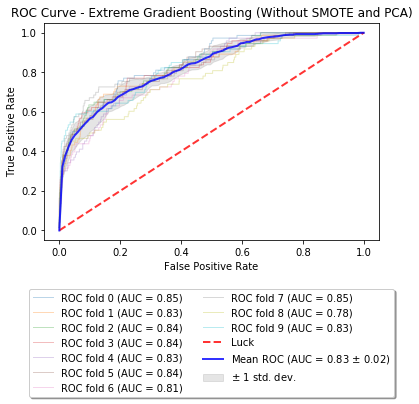

In [52]:
X_cv = X.as_matrix()
cv = StratifiedKFold(n_splits=10)
classifier = XGBClassifier(learning_rate = 0.1, max_depth = 8, n_estimators = 200, objective = 'binary:logistic')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    #X_train = X_train.iloc[train]
    #Y_train = Y_train.iloc[test]
    #X_test = X_train.iloc[test]
    #Y_test = y_resampled
    probas_ = classifier.fit(X_cv[train], y[train]).predict_proba(X_cv[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
#fig = plt.figure()
#ax = plt.subplot(1)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extreme Gradient Boosting (Without SMOTE and PCA)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),  shadow=True, ncol=2)
plt.show()

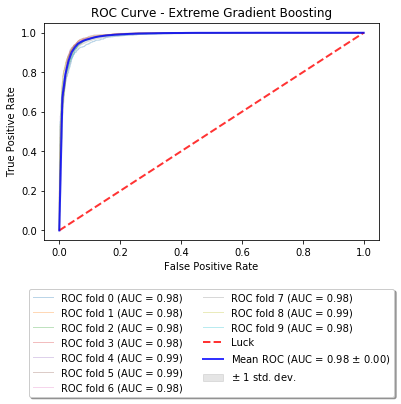

In [53]:
cv = StratifiedKFold(n_splits=10)
classifier = XGBClassifier(learning_rate = 0.1, max_depth = 8, n_estimators = 200, objective = 'binary:logistic')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X_res_vis, y_resampled):
    #X_train = X_train.iloc[train]
    #Y_train = Y_train.iloc[test]
    #X_test = X_train.iloc[test]
    #Y_test = y_resampled
    probas_ = classifier.fit(X_res_vis[train], y_resampled[train]).predict_proba(X_res_vis[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_resampled[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extreme Gradient Boosting')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),  shadow=True, ncol=2)
plt.show()

In [141]:
data = subject_details_normalized
print('1: %i' %data[data['AGE_1']==1].count()['SUBJECT_ID'])
print('1 side_effects: %d'  %data[(data['AGE_1']==1) & (data['SIDE_EFFECTS_FLAG']==1.0)].count()['SUBJECT_ID'])

print('2: %i' %data[data['AGE_2']==1].count()['SUBJECT_ID'])
print('2 side_effects: %d'  %data[(data['AGE_2']==1) & (data['SIDE_EFFECTS_FLAG']==1.0)].count()['SUBJECT_ID'])


print('3: %i' %data[data['AGE_3']==1].count()['SUBJECT_ID'])
print('3 side_effects: %d'  %data[(data['AGE_3']==1) & (data['SIDE_EFFECTS_FLAG']==1.0)].count()['SUBJECT_ID'])


print('4: %i' %data[data['AGE_4']==1].count()['SUBJECT_ID'])
print('4 side_effects: %d'  %data[(data['AGE_4']==1) & (data['SIDE_EFFECTS_FLAG']==1.0)].count()['SUBJECT_ID'])


print('5: %i' %data[data['AGE_5']==1].count()['SUBJECT_ID'])
print('5 side_effects: %d'  %data[(data['AGE_5']==1) & (data['SIDE_EFFECTS_FLAG']==1.0)].count()['SUBJECT_ID'])


print('6: %i' %data[data['AGE_6']==1].count()['SUBJECT_ID'])
print('6 side_effects: %d'  %data[(data['AGE_6']==1) & (data['SIDE_EFFECTS_FLAG']==1.0)].count()['SUBJECT_ID'])


print('7: %i' %data[data['AGE_7']==1].count()['SUBJECT_ID'])
print('7 side_effects: %d'  %data[(data['AGE_7']==1) & (data['SIDE_EFFECTS_FLAG']==1.0)].count()['SUBJECT_ID'])


print('8: %i' %data[data['AGE_8']==1].count()['SUBJECT_ID'])
print('8 side_effects: %d'  %data[(data['AGE_8']==1) & (data['SIDE_EFFECTS_FLAG']==1.0)].count()['SUBJECT_ID'])

1: 269
1 side_effects: 0
2: 253
2 side_effects: 7
3: 2949
3 side_effects: 254
4: 3273
4 side_effects: 203
5: 8507
5 side_effects: 251
6: 5974
6 side_effects: 26
7: 5906
7 side_effects: 7
8: 2861
8 side_effects: 1


In [133]:
len(data)

20703

In [137]:
subject_details = pd.read_pickle('../../Data/Opioids/Model_Data/subject_details_age.pickle')
subject_details.drop(["AGE"], axis=1, inplace=True)
subject_details.head()

,SUBJECT_ID,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,...,MEPERIDINE,HYDROMORPHONE,HYDROCODONE,FENTANYL,CODEINE,BUPRENORPHINE,METHADONE,NALOXONE,SIDE_EFFECTS_FLAG,AGE_GROUP
0,249,0,0,8.0,0.0,1,0,1,0.0,4.0,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,250,0,1,6.0,0.0,1,0,1,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,3
2,252,1,0,4.0,0.0,1,0,1,0.0,0.0,...,2.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,5
3,255,1,0,2.0,0.0,1,0,0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,256,1,0,22.0,0.0,1,0,1,0.0,31.0,...,0.0,5.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,7


In [138]:
x = subject_details.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
subject_details_normalized = pd.DataFrame(x_scaled)
subject_details_normalized.columns=subject_details.columns
subject_details_normalized.drop(["SUBJECT_ID","AGE_GROUP"], axis=1, inplace=True)
subject_details_normalized["AGE_GROUP"] = subject_details["AGE_GROUP"].values
subject_details_normalized["SUBJECT_ID"] = subject_details["SUBJECT_ID"].values
subject_details_normalized.head()

,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,MORPHINE,...,HYDROMORPHONE,HYDROCODONE,FENTANYL,CODEINE,BUPRENORPHINE,METHADONE,NALOXONE,SIDE_EFFECTS_FLAG,AGE_GROUP,SUBJECT_ID
0,0.0,0.0,0.020305,0.0,1.0,0.0,1.0,0.0,0.010499,0.037694,...,0.013857,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7,249
1,0.0,1.0,0.015228,0.0,1.0,0.0,1.0,0.0,0.000000,0.004435,...,0.000000,0.0,0.006754,0.0,0.0,0.090024,0.0,0.0,3,250
2,1.0,0.0,0.010152,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.006303,0.0,0.0,0.090024,0.0,0.0,5,252
3,1.0,0.0,0.005076,0.0,1.0,0.0,0.0,0.0,0.010499,0.008869,...,0.000000,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7,255
4,1.0,0.0,0.055838,0.0,1.0,0.0,1.0,0.0,0.081365,0.008869,...,0.005774,0.0,0.004052,0.0,0.0,0.090024,0.0,0.0,7,256


In [139]:
cols = subject_details_normalized.columns.tolist()
cols = cols[-1:] + cols[:-1]
subject_details_normalized = subject_details_normalized[cols]
subject_details_normalized.head()

,SUBJECT_ID,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,...,MEPERIDINE,HYDROMORPHONE,HYDROCODONE,FENTANYL,CODEINE,BUPRENORPHINE,METHADONE,NALOXONE,SIDE_EFFECTS_FLAG,AGE_GROUP
0,249,0.0,0.0,0.020305,0.0,1.0,0.0,1.0,0.0,0.010499,...,0.000000,0.013857,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7
1,250,0.0,1.0,0.015228,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.006754,0.0,0.0,0.090024,0.0,0.0,3
2,252,1.0,0.0,0.010152,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.015625,0.000000,0.0,0.006303,0.0,0.0,0.090024,0.0,0.0,5
3,255,1.0,0.0,0.005076,0.0,1.0,0.0,0.0,0.0,0.010499,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7
4,256,1.0,0.0,0.055838,0.0,1.0,0.0,1.0,0.0,0.081365,...,0.000000,0.005774,0.0,0.004052,0.0,0.0,0.090024,0.0,0.0,7


In [140]:
subject_details_normalized["AGE_GROUP"] = subject_details_normalized["AGE_GROUP"].astype('category', categories=[1,2,3,4,5,6,7,8])
age_group_df = pd.get_dummies(subject_details_normalized["AGE_GROUP"])
age_group_df.columns=["AGE_1", "AGE_2", "AGE_3", "AGE_4", "AGE_5", "AGE_6", "AGE_7", "AGE_8"]
subject_details_normalized = pd.merge(subject_details_normalized, age_group_df, left_index=True, how='left', right_index=True)
subject_details_normalized.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


,SUBJECT_ID,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,...,SIDE_EFFECTS_FLAG,AGE_GROUP,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,AGE_7,AGE_8
0,249,0.0,0.0,0.020305,0.0,1.0,0.0,1.0,0.0,0.010499,...,0.0,7,0,0,0,0,0,0,1,0
1,250,0.0,1.0,0.015228,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.0,3,0,0,1,0,0,0,0,0
2,252,1.0,0.0,0.010152,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.0,5,0,0,0,0,1,0,0,0
3,255,1.0,0.0,0.005076,0.0,1.0,0.0,0.0,0.0,0.010499,...,0.0,7,0,0,0,0,0,0,1,0
4,256,1.0,0.0,0.055838,0.0,1.0,0.0,1.0,0.0,0.081365,...,0.0,7,0,0,0,0,0,0,1,0
